# Пример работы с библиотекой Facebook Prophet #
Небольшой пример  прогнозирования для сисадминов. 
Используем данные о температуре жесткого диска полученные из zabbix, чтобы  прогнозировать эту температуру в последующие дни.


-----
Обсуждение корректности в данном случае и применимости автокорреляции вообще, выходит за рамки этого примера (это скорее не работает).

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
# библиотеки генерируют массу предупреждений
# Придется их игнорировать
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('exported-from-zabbix-monotonic.csv',index_col=0)
df = df.rename(columns = {'ts':'ds','value':'y'})

загрузим и проверим данные


<AxesSubplot:xlabel='ds'>

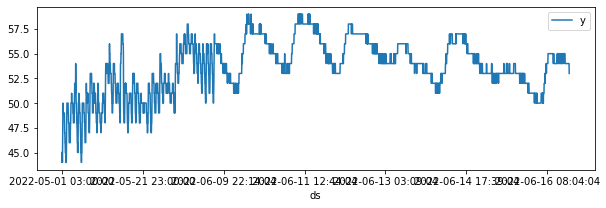

In [4]:
df.plot(x='ds',y='y',figsize=(10,3))

<AxesSubplot:xlabel='ds'>

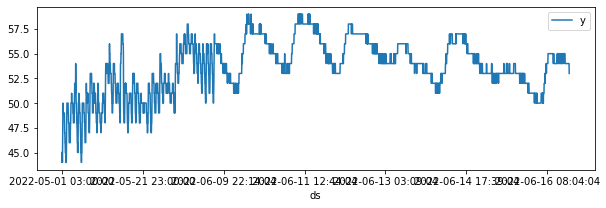

In [5]:
#df=df[('2022-06-09 20:0:0' < df['ds'])]
df.plot(x='ds',y='y',figsize=(10,3))

In [6]:
m = Prophet(growth='linear',daily_seasonality=True,weekly_seasonality=False,yearly_seasonality=False)
m.fit(df);

Initial log joint probability = -7.06952
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10746.5     0.0246871       7185.74           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10913.8     0.0327139       6562.97           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10964.1    0.00904929       2616.69           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10994.1    0.00492984       1250.46           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11010.6    0.00187386       324.552           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [7]:
future = m.make_future_dataframe(periods=24*5, freq='H')
forecast = m.predict(future);

## Прогноз температуры  на ближайшие 5 дней ## 

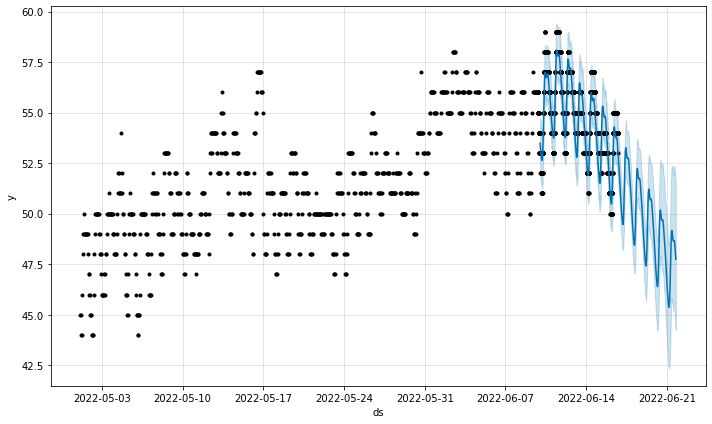

In [13]:
m.plot(forecast[('2022-06-10 0:0:0' < forecast['ds'])]);

Очевидно, метод уловил снижающийся тренд и регулярные суточные колебания.
Конечно же, температура не может снижаться до нуля. Это просто пример использования почти автоматического метода прогнозирования.

В реальных задачах необходимо иметь объясняющую модель и понимание насколько прошлое похоже на будущее.

## Литература ##
- https://otexts.com/fpp3/
- https://facebook.github.io/prophet/